In [1]:
# Cell 1: Import và định nghĩa các hàm xử lý âm thanh
import os
import numpy as np
import noisereduce as nr
from scipy.io import wavfile
from pydub import AudioSegment
import librosa
import matplotlib.pyplot as plt
import librosa.display

class AudioPreprocessor:
    def __init__(self):
        self.target_sr = 16000
        
    def load_audio(self, input_path):
        """Load and convert audio to mono 16kHz"""
        audio = AudioSegment.from_wav(input_path).set_channels(1).set_frame_rate(self.target_sr)
        raw_audio = np.array(audio.get_array_of_samples())
        rate = audio.frame_rate
        return raw_audio, rate
        
    def denoise(self, audio, sr):
        """Apply noise reduction"""
        denoised = nr.reduce_noise(y=audio.astype(np.float32), sr=sr)
        if sr != self.target_sr:
            denoised = librosa.resample(denoised, orig_sr=sr, target_sr=self.target_sr)
        return denoised, self.target_sr
        
    def extract_one_second(self, audio, sr):
        """Extract 1 second with highest energy"""
        segment_len = int(1.0 * sr)
        stride = int(0.02 * sr)

        max_energy = 0
        best_start = 0
        for i in range(0, len(audio) - segment_len + 1, stride):
            window = audio[i:i + segment_len]
            energy = np.sum(window.astype(np.float32) ** 2)
            if energy > max_energy:
                max_energy = energy
                best_start = i

        return audio[best_start:best_start + segment_len]
        
    def normalize_audio(self, audio):
        """Apply peak normalization"""
        max_val = np.max(np.abs(audio))
        if max_val > 0:
            audio = audio / max_val * 0.99
        return (audio * 32767).astype(np.int16)
        
    def process_audio_file(self, input_path):
        """Main processing pipeline"""
        # Load audio
        raw_audio, rate = self.load_audio(input_path)
        
        # Denoise
        denoised_audio, rate = self.denoise(raw_audio, rate)
        
        # Get 1 second segment
        one_sec_segment = self.extract_one_second(denoised_audio, rate)
        
        # Normalize
        final_output = self.normalize_audio(one_sec_segment)
        
        return final_output, rate


In [2]:
# Cell 2: Hàm trực quan hóa chi tiết
def visualize_processing_steps(input_path):
    """
    Trực quan hóa từng bước xử lý âm thanh
    """
    processor = AudioPreprocessor()
    
    # Load audio
    raw_audio, rate = processor.load_audio(input_path)
    
    # Denoise
    denoised_audio, rate = processor.denoise(raw_audio, rate)
    
    # Get 1 second segment
    one_sec_segment = processor.extract_one_second(denoised_audio, rate)
    
    # Normalize
    final_output = processor.normalize_audio(one_sec_segment)
    
    # Tạo figure với 4 subplot
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    
    # 1. Waveform gốc
    librosa.display.waveshow(raw_audio.astype(np.float32)/32767, sr=rate, ax=axes[0])
    axes[0].set_title('Original Audio Waveform')
    axes[0].set_xlabel('')
    
    # 2. Waveform sau khi lọc nhiễu
    librosa.display.waveshow(denoised_audio, sr=rate, ax=axes[1])
    axes[1].set_title('After Noise Reduction')
    axes[1].set_xlabel('')
    
    # 3. Waveform đoạn 1s
    librosa.display.waveshow(one_sec_segment, sr=rate, ax=axes[2])
    axes[2].set_title('1 Second Segment')
    axes[2].set_xlabel('')
    
    # 4. Mel spectrogram cuối cùng
    mel_spec = librosa.feature.melspectrogram(y=final_output.astype(np.float32)/32767, sr=rate)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=rate, ax=axes[3])
    axes[3].set_title('Final Mel Spectrogram')
    
    plt.tight_layout()
    plt.show()
    
    # In thông tin về file
    print(f"File: {input_path}")
    print(f"Original duration: {len(raw_audio)/rate:.2f}s")
    print(f"Final duration: {len(final_output)/rate:.2f}s")
    print(f"Sample rate: {rate}Hz")
    
    # In thông tin về năng lượng
    energy_orig = np.sum(raw_audio.astype(np.float32)**2)
    energy_final = np.sum(final_output.astype(np.float32)**2)
    print(f"\nEnergy analysis:")
    print(f"Original energy: {energy_orig:.2f}")
    print(f"Final energy: {energy_final:.2f}")
    print(f"Energy ratio (Final/Original): {energy_final/energy_orig:.2f}")




Visualizing processing steps for: bat_den


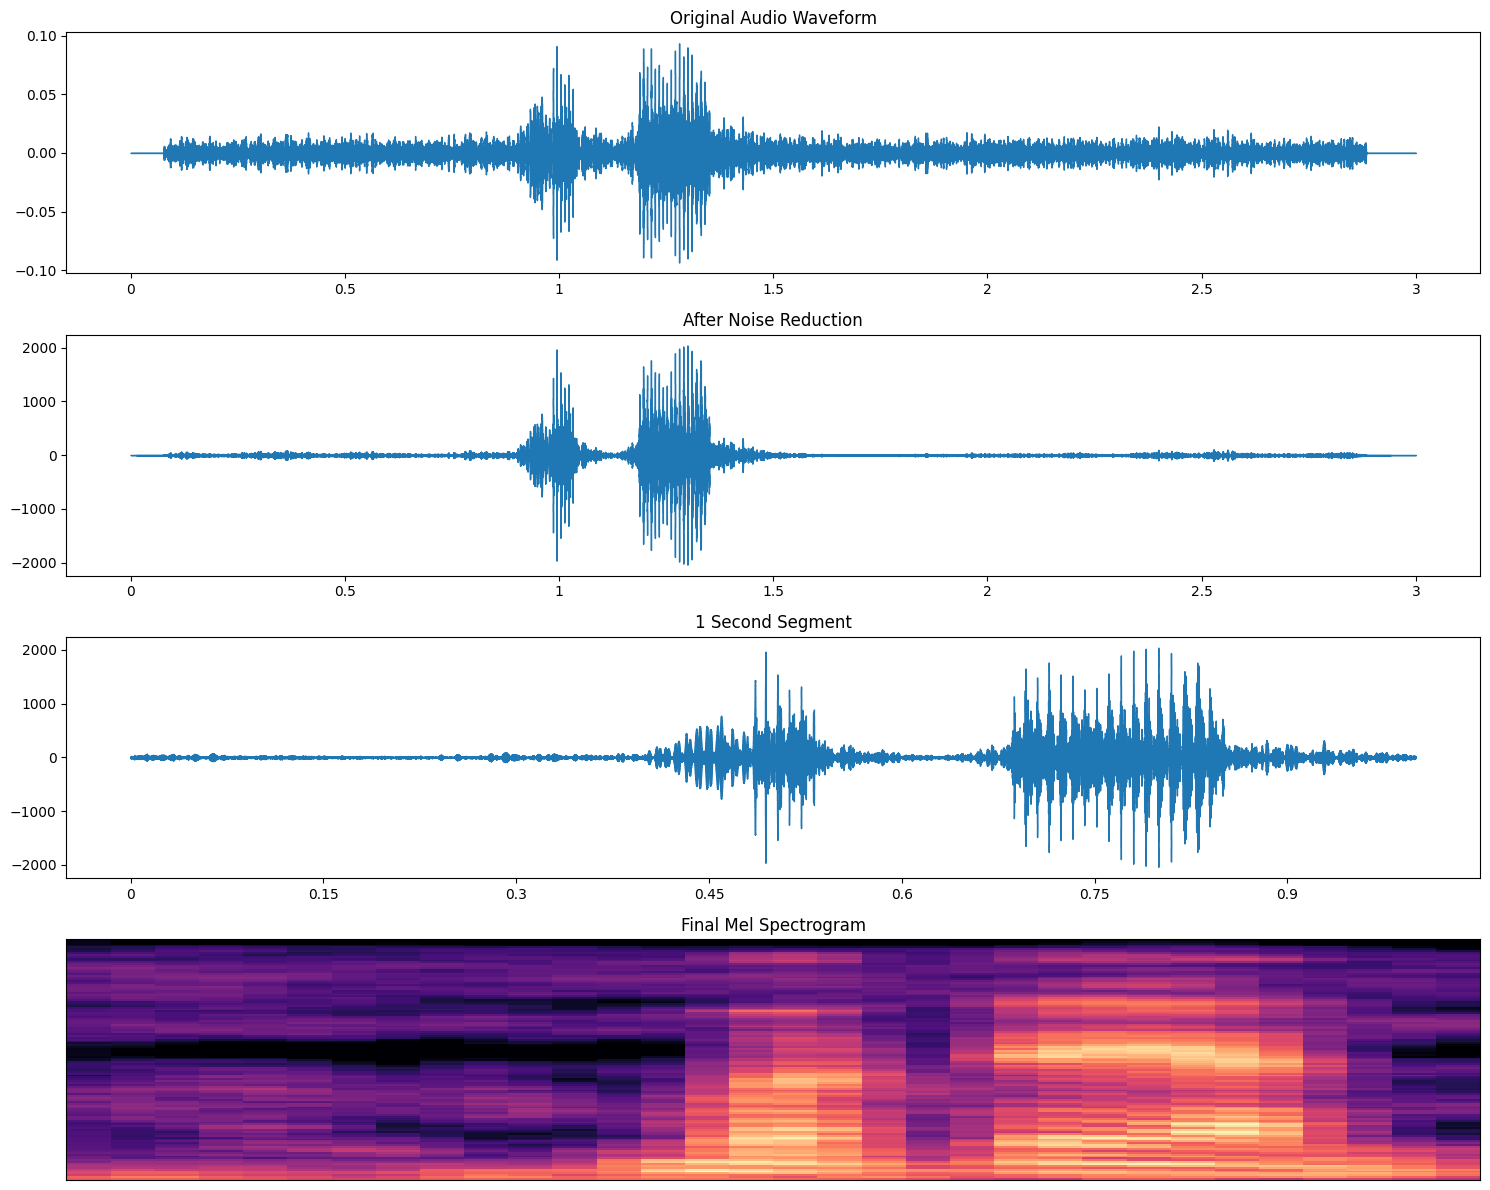

File: ../data/raw/bat_den/bat_den_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 3734743296.00
Final energy: 211706347520.00
Energy ratio (Final/Original): 56.69

Visualizing processing steps for: bat_dieu_hoa


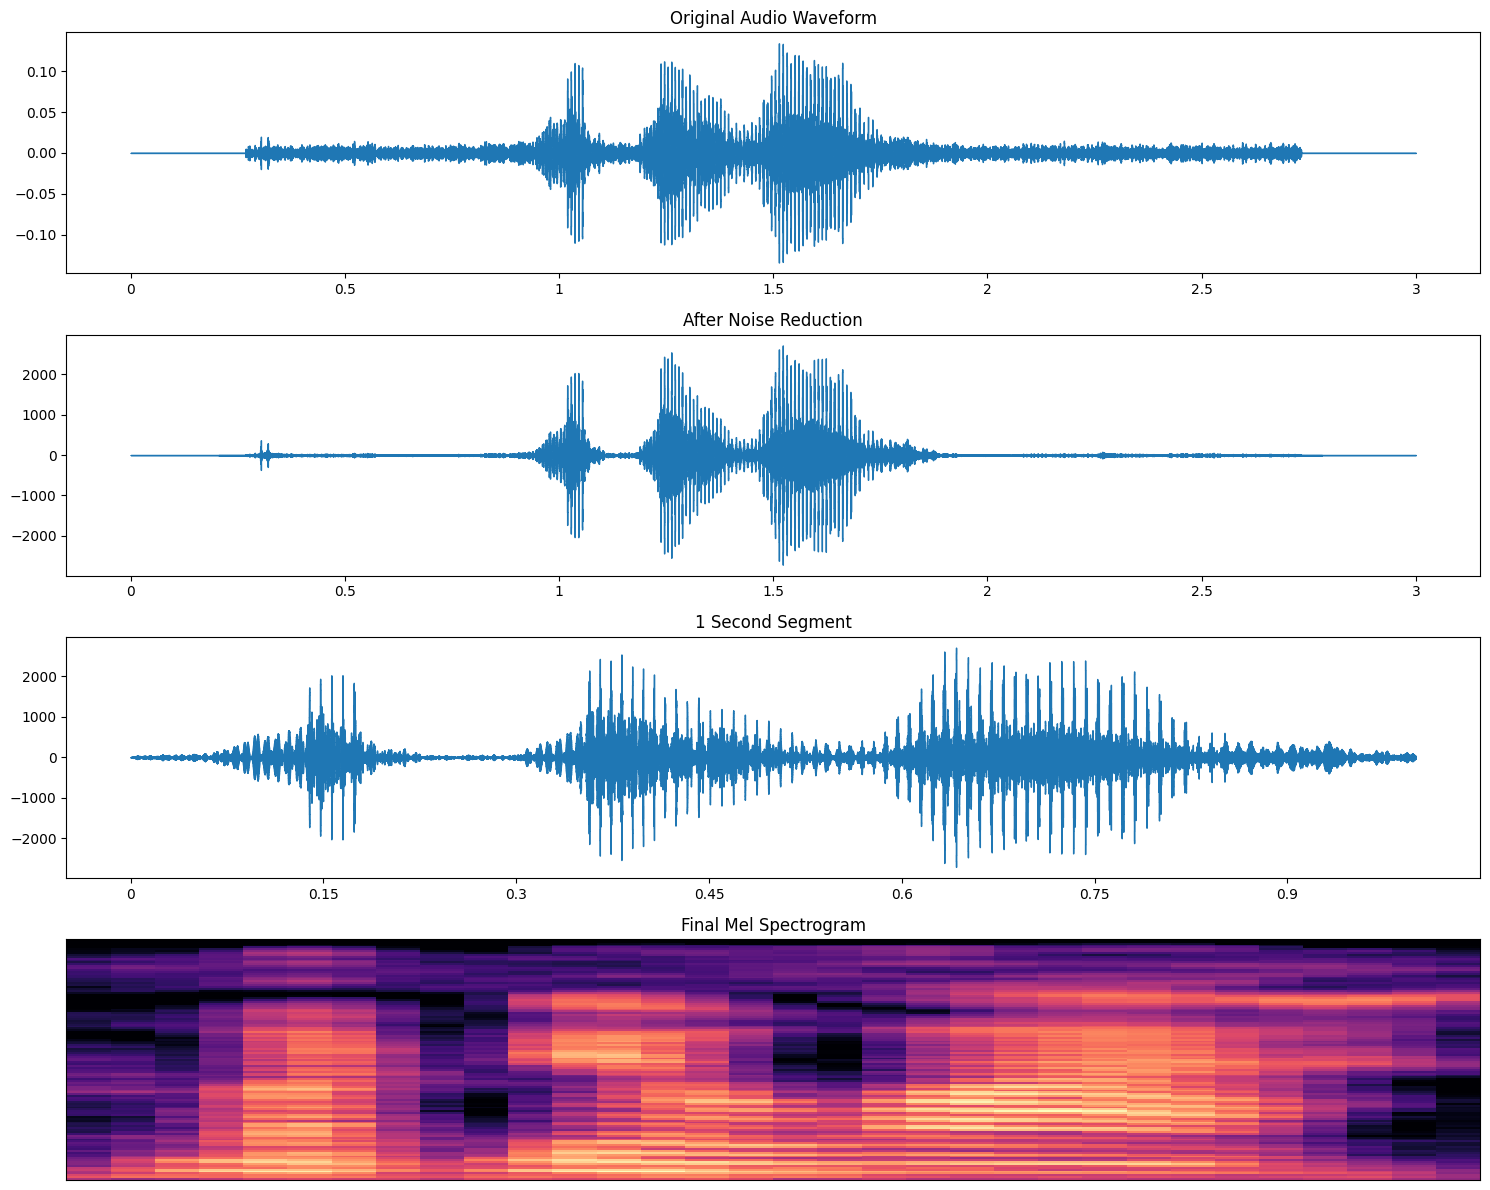

File: ../data/raw/bat_dieu_hoa/bat_dieu_hoa_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 8260879872.00
Final energy: 347372191744.00
Energy ratio (Final/Original): 42.05

Visualizing processing steps for: bat_quat


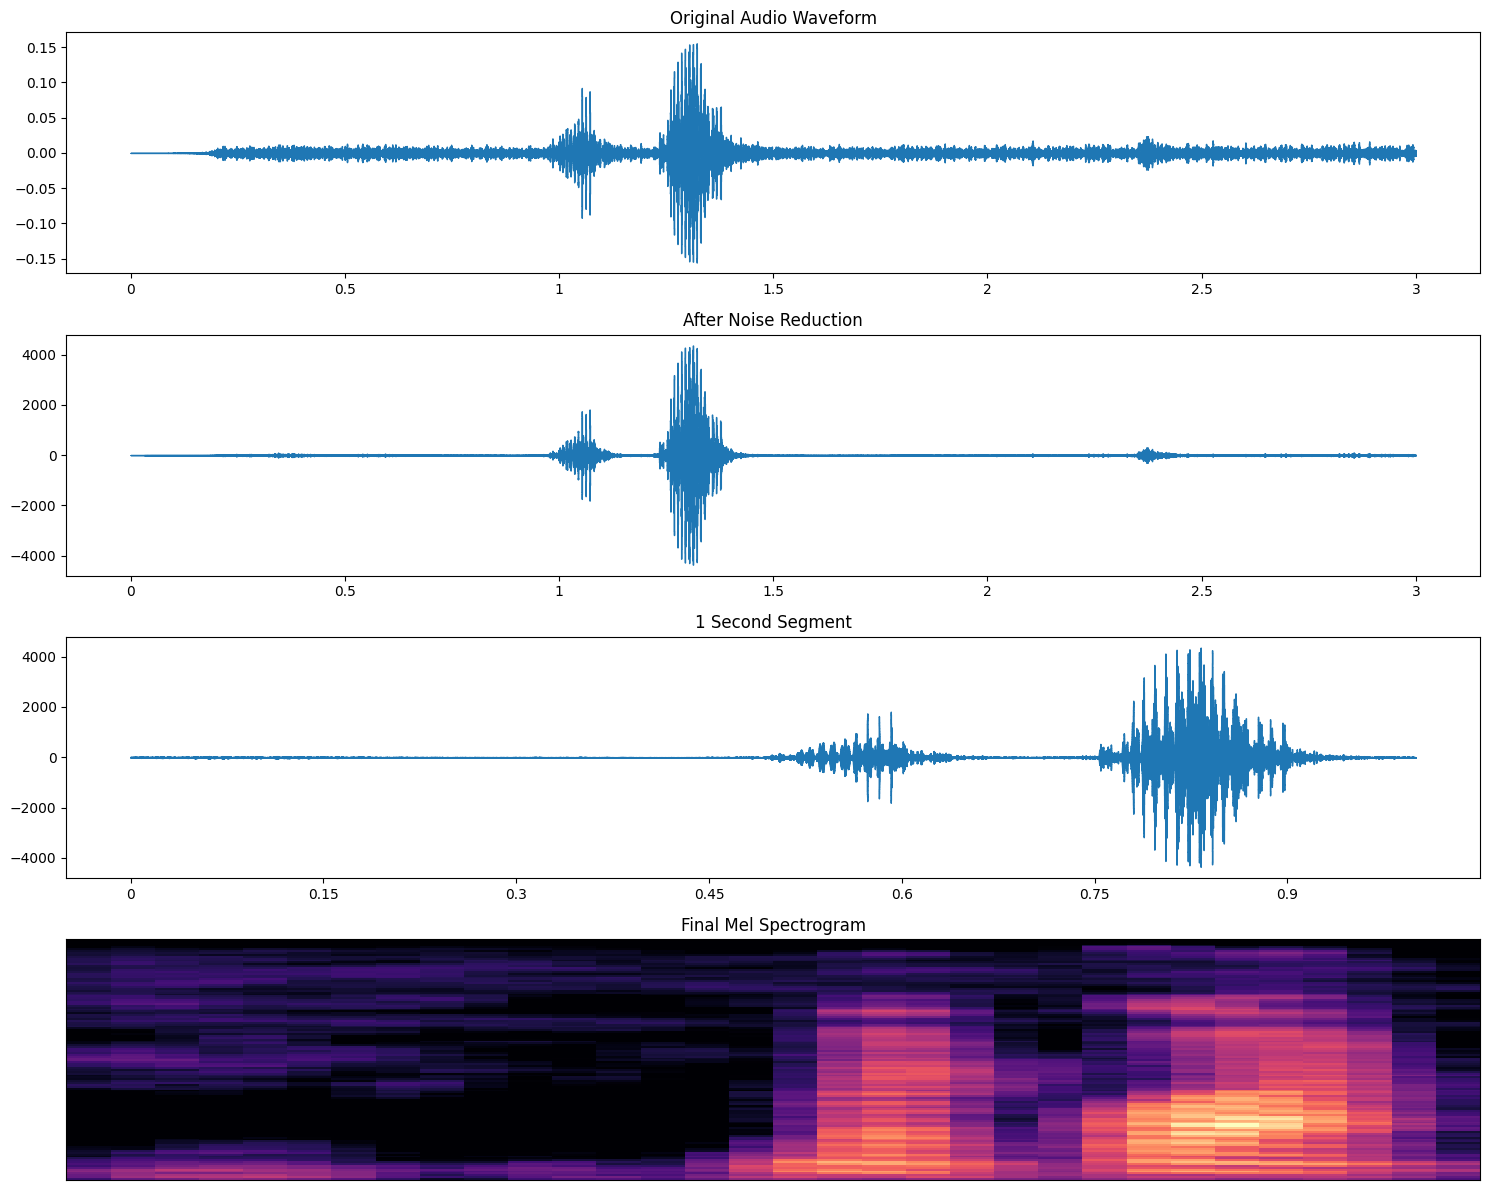

File: ../data/raw/bat_quat/bat_quat_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 5888293376.00
Final energy: 190964695040.00
Energy ratio (Final/Original): 32.43

Visualizing processing steps for: bat_tv


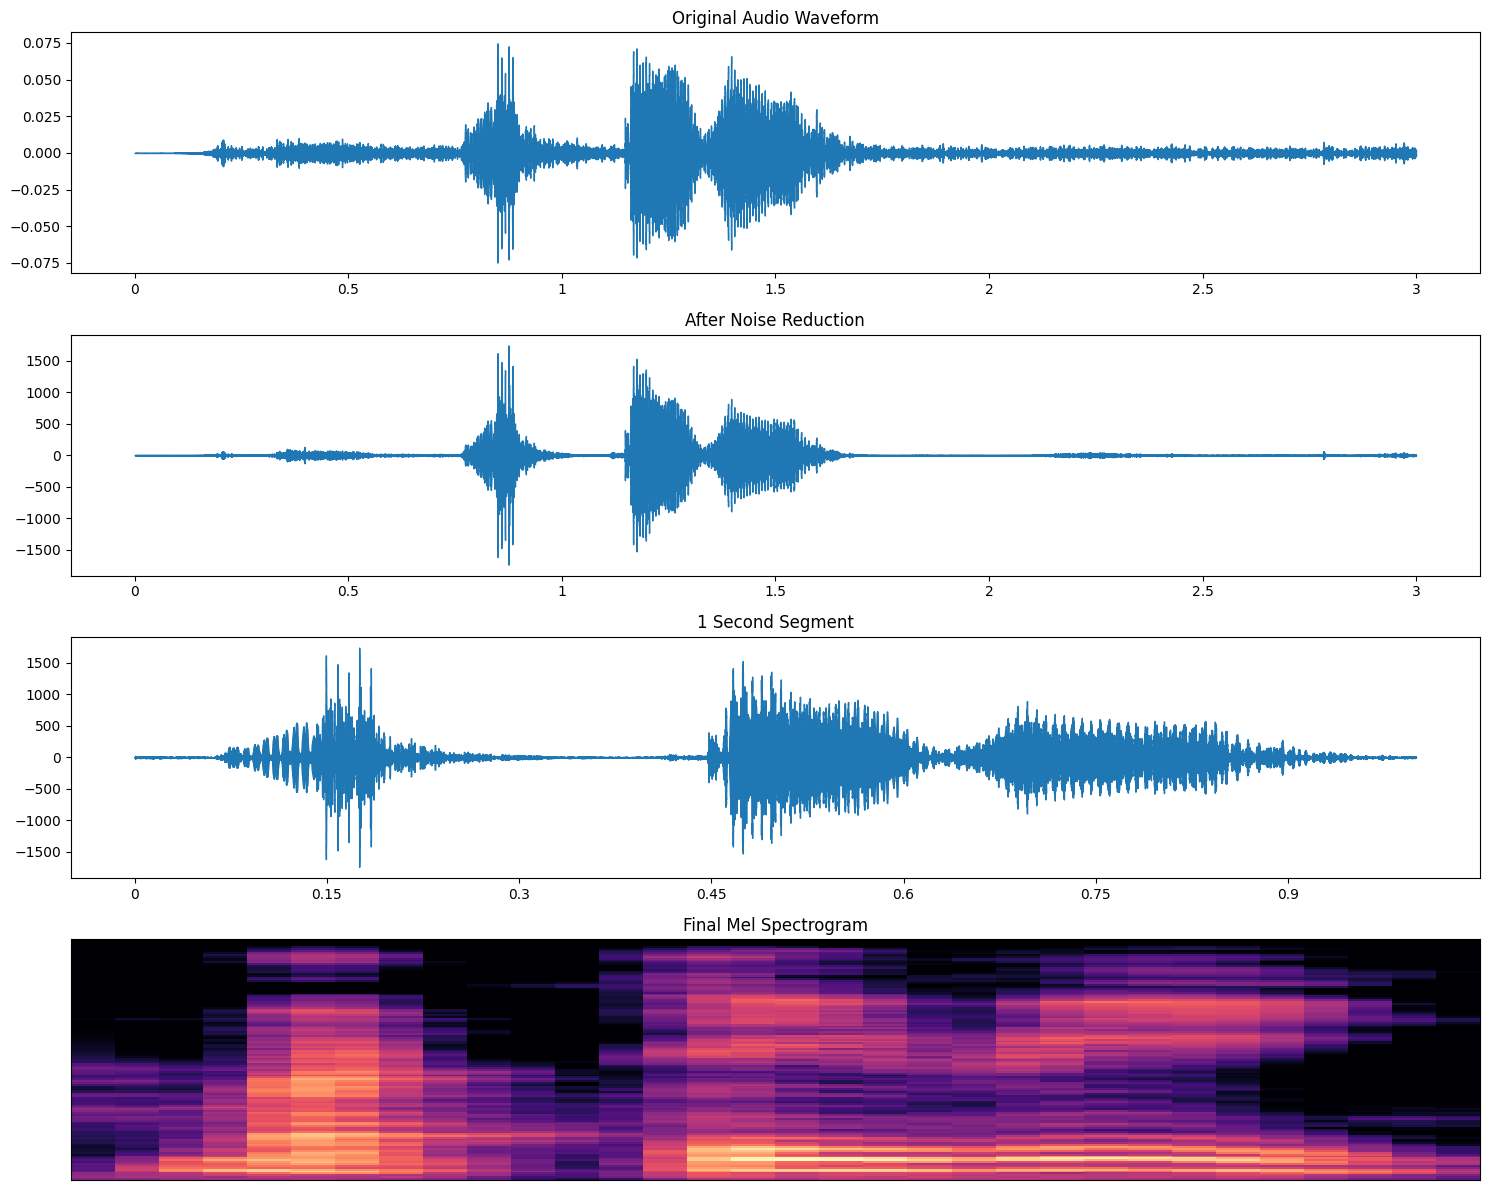

File: ../data/raw/bat_tv/bat_tv_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 5224973312.00
Final energy: 424020082688.00
Energy ratio (Final/Original): 81.15

Visualizing processing steps for: do_am


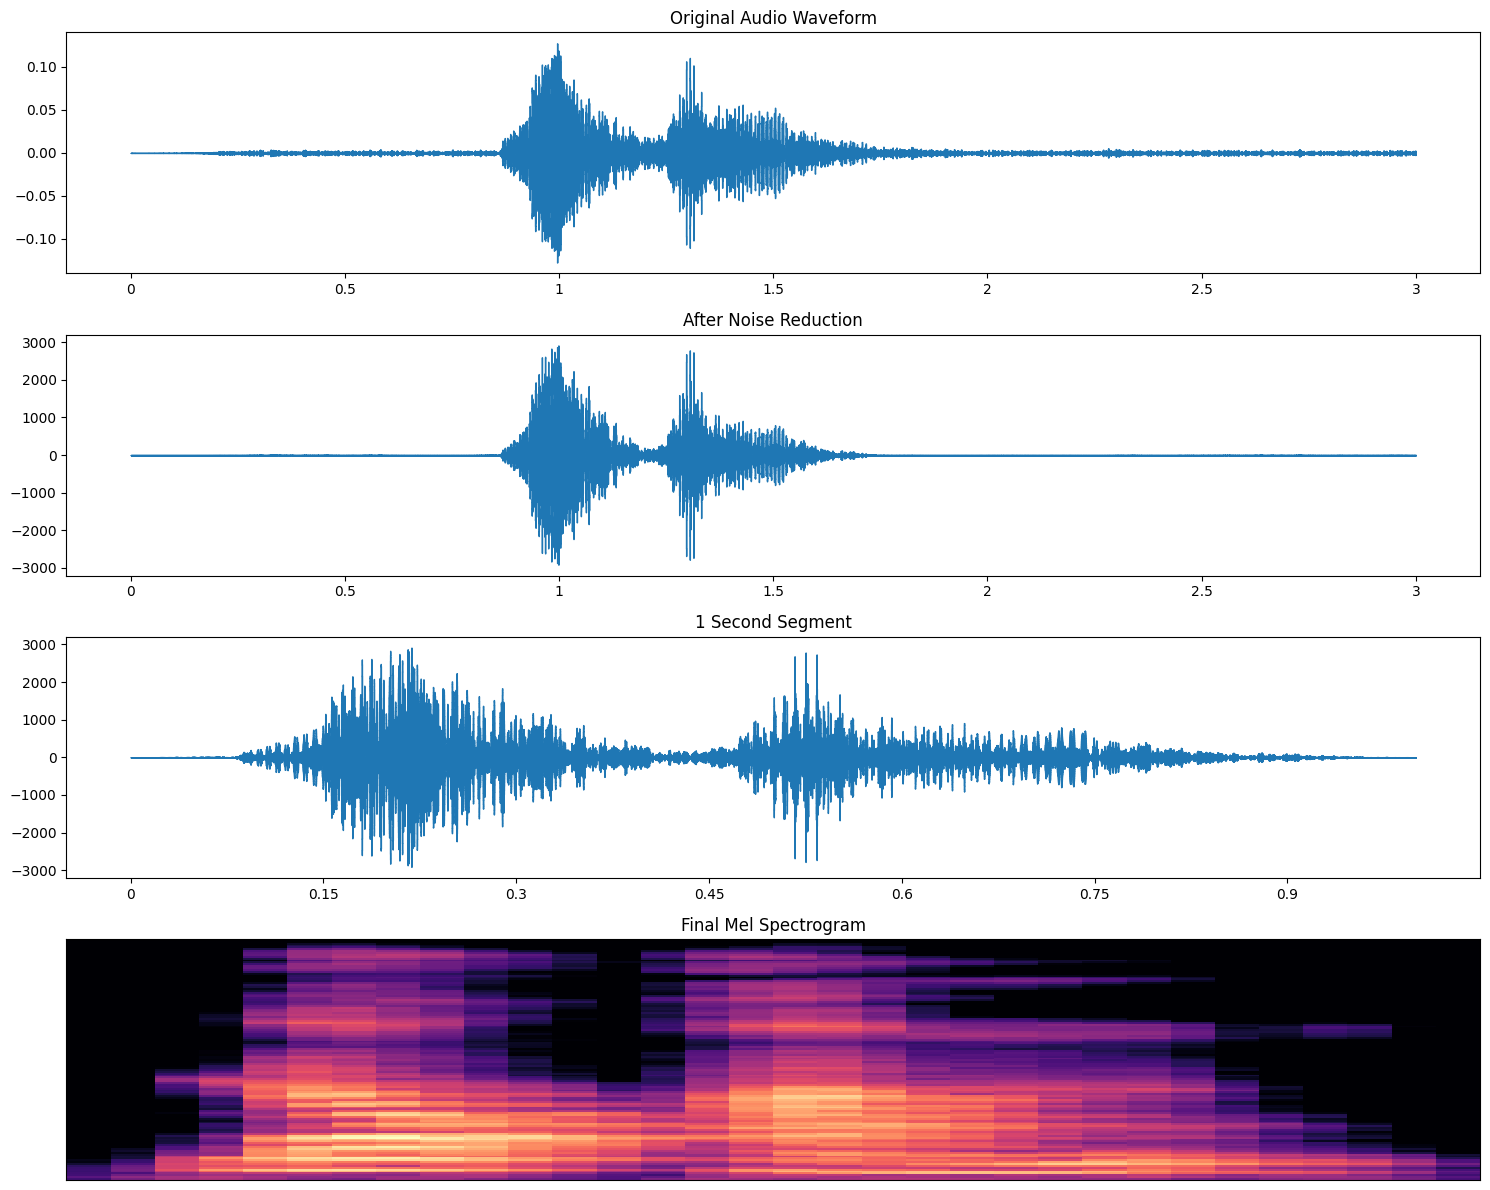

File: ../data/raw/do_am/do_am_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 8407314432.00
Final energy: 462589722624.00
Energy ratio (Final/Original): 55.02

Visualizing processing steps for: dong_rem


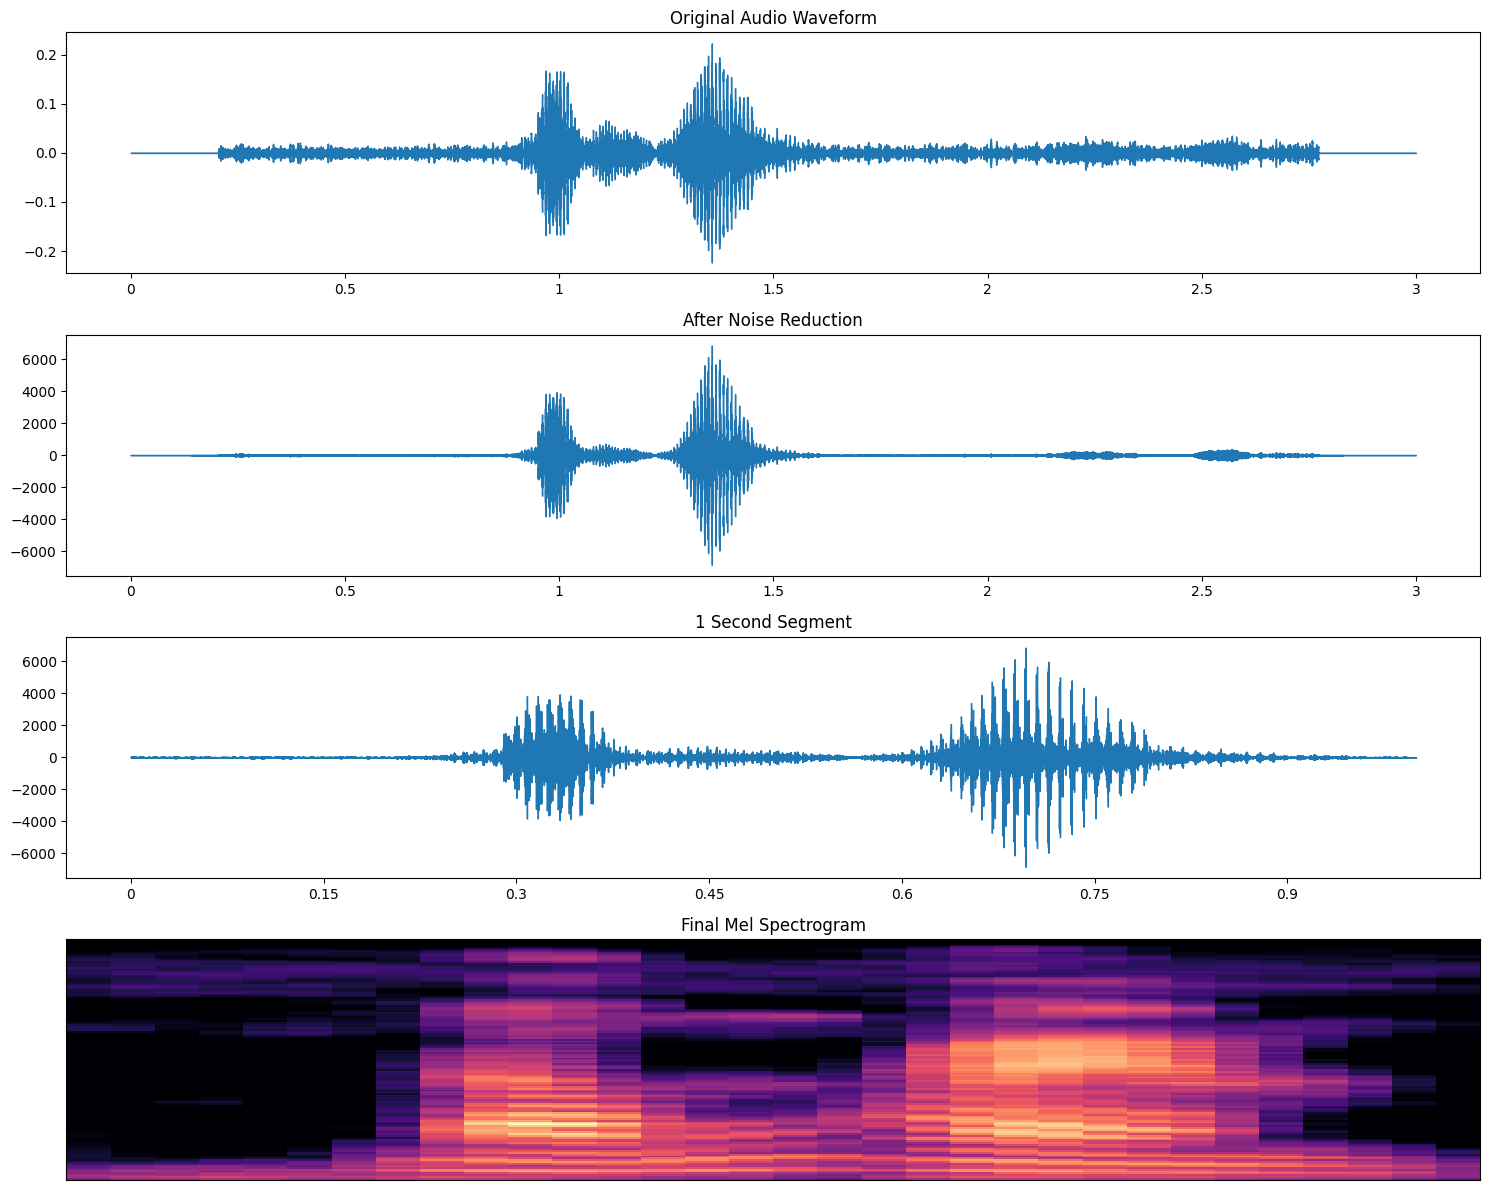

File: ../data/raw/dong_rem/dong_rem_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 16366075904.00
Final energy: 161278476288.00
Energy ratio (Final/Original): 9.85

Visualizing processing steps for: mo_rem


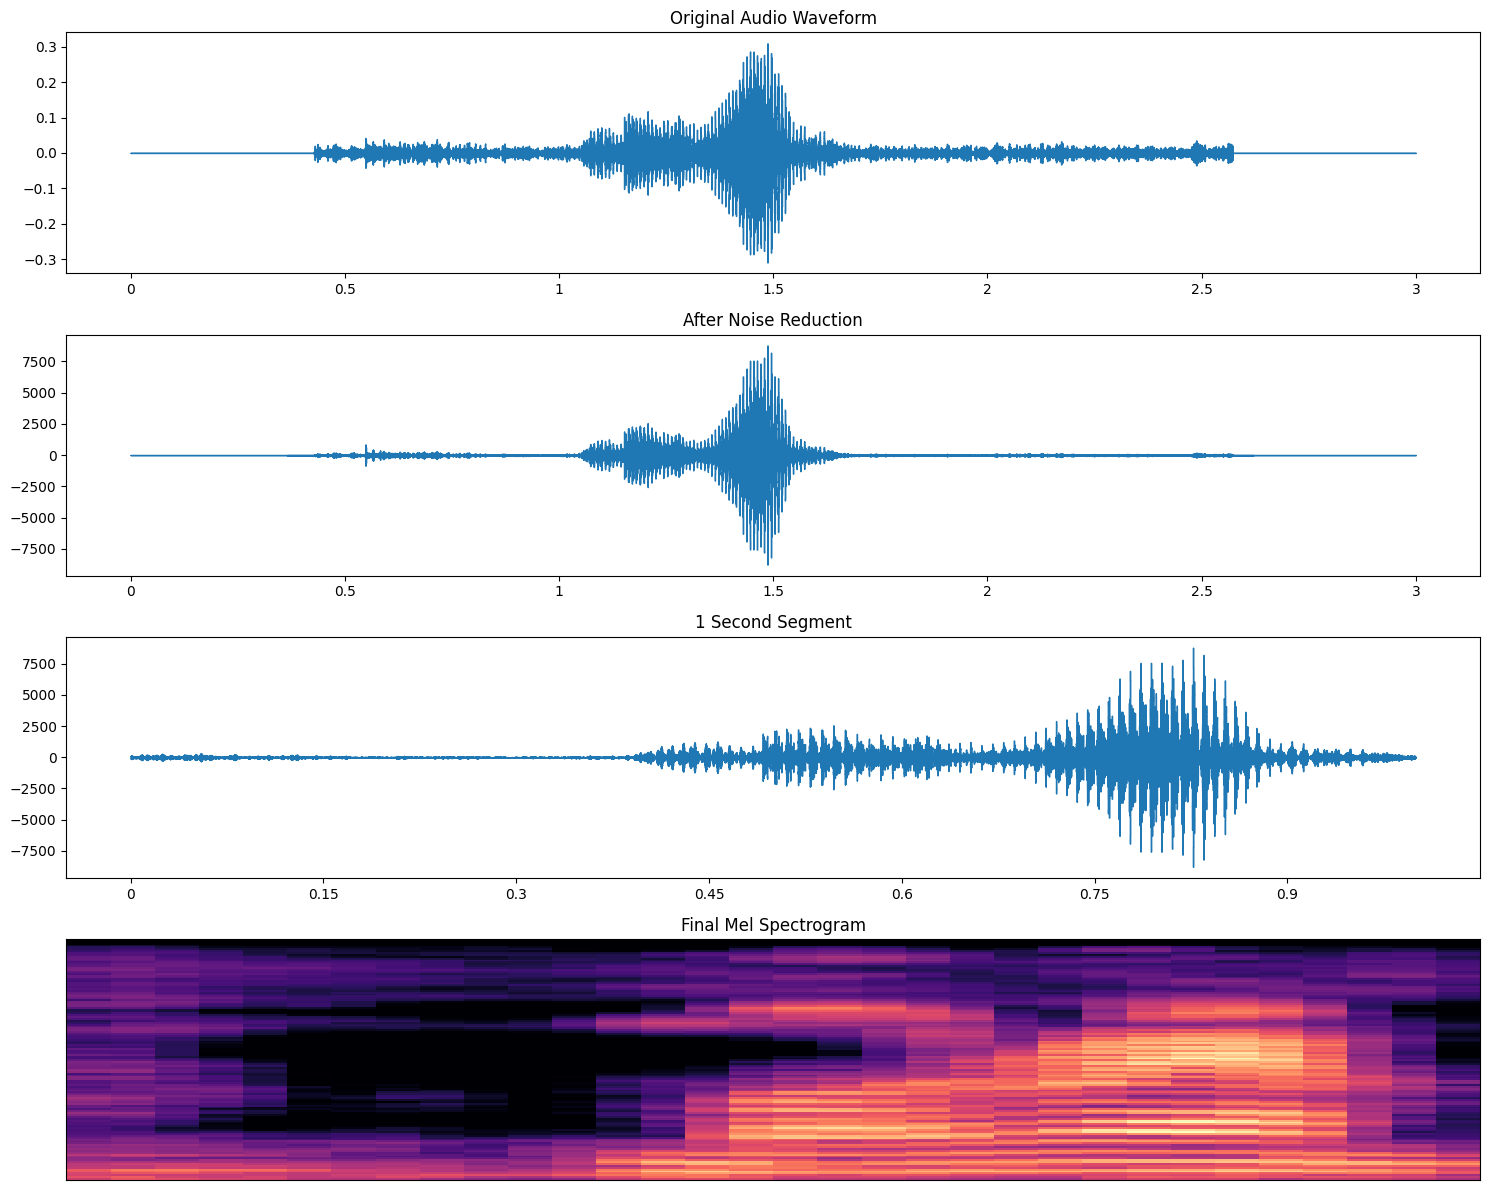

File: ../data/raw/mo_rem/mo_rem_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 27841640448.00
Final energy: 150529228800.00
Energy ratio (Final/Original): 5.41

Visualizing processing steps for: nhiet_do


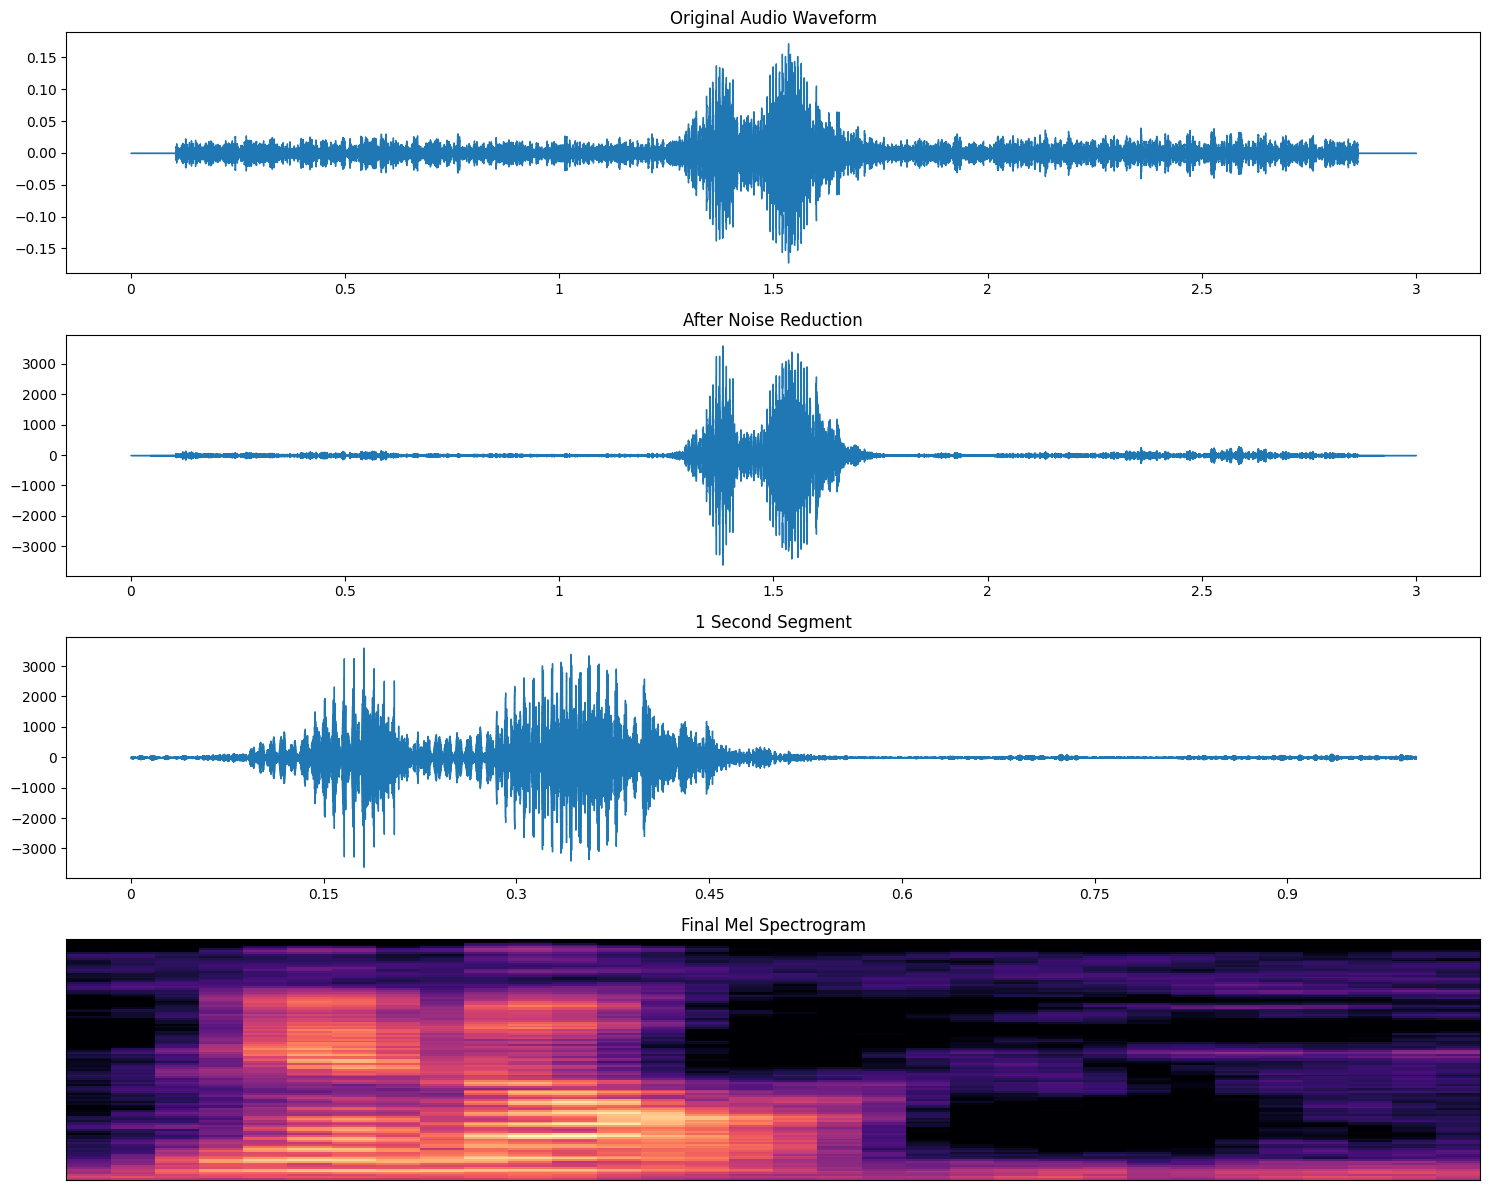

File: ../data/raw/nhiet_do/nhiet_do_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 14872062976.00
Final energy: 300801490944.00
Energy ratio (Final/Original): 20.23

Visualizing processing steps for: tat_den


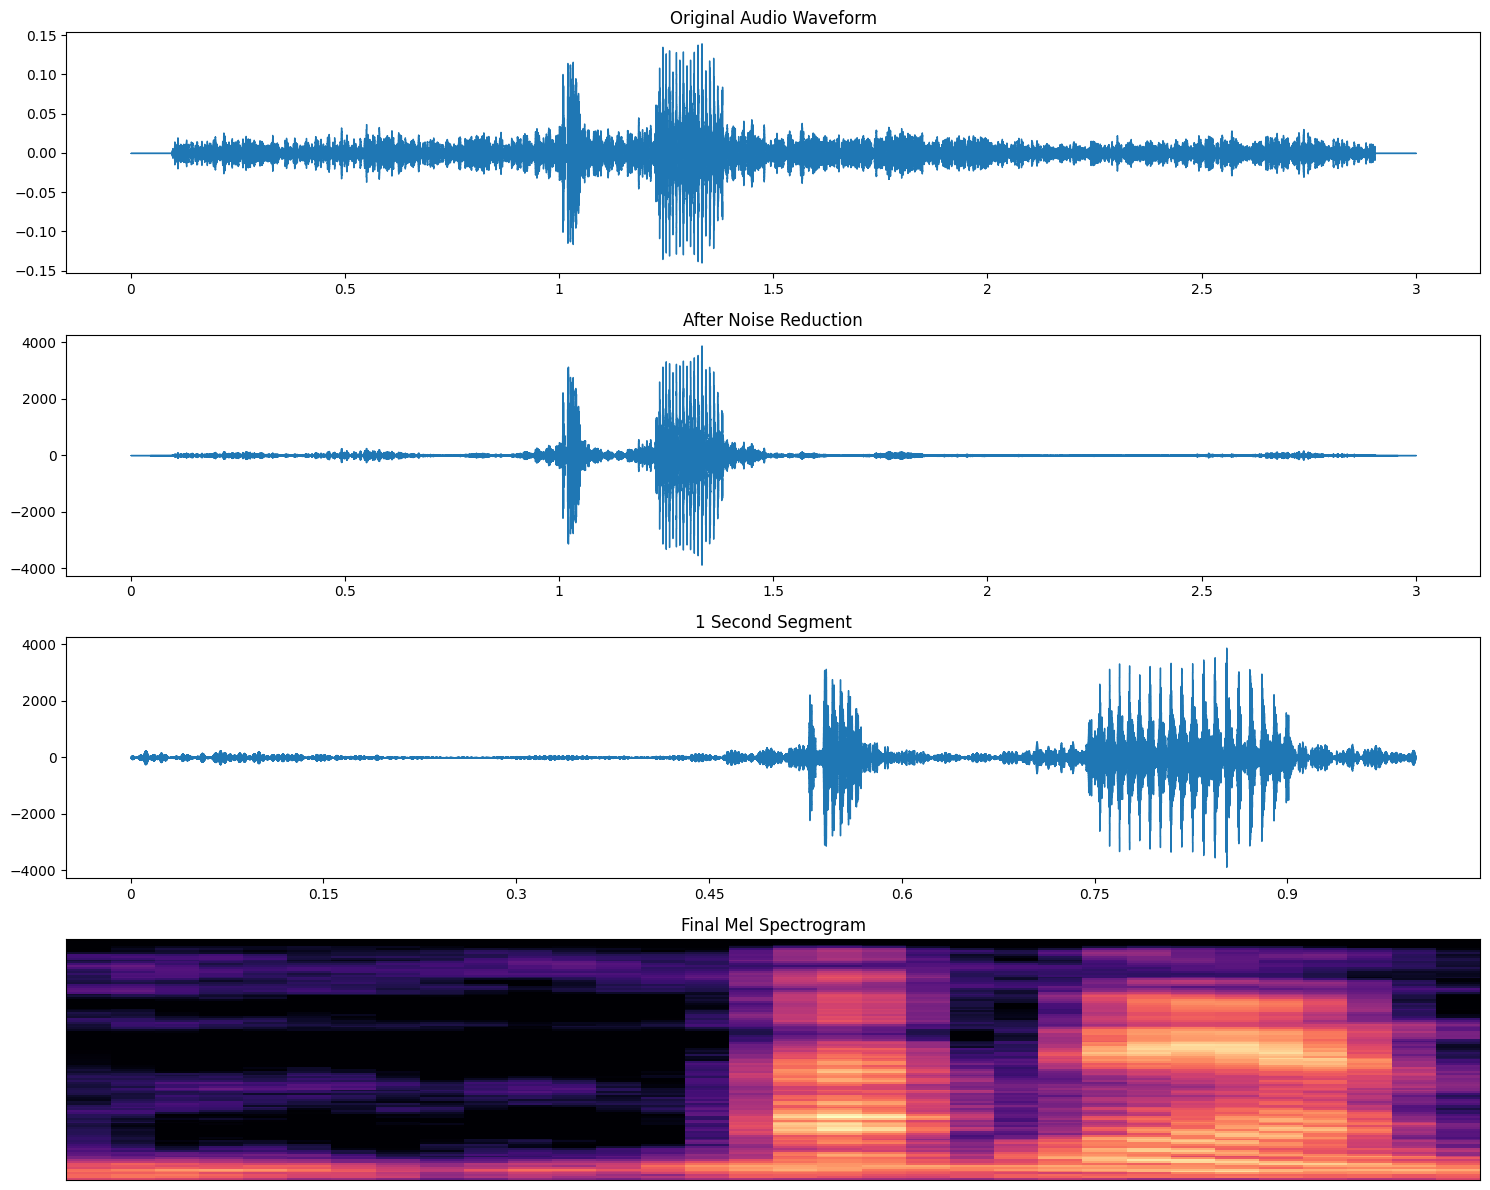

File: ../data/raw/tat_den/tat_den_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 9522368512.00
Final energy: 200566325248.00
Energy ratio (Final/Original): 21.06

Visualizing processing steps for: tat_dieu_hoa


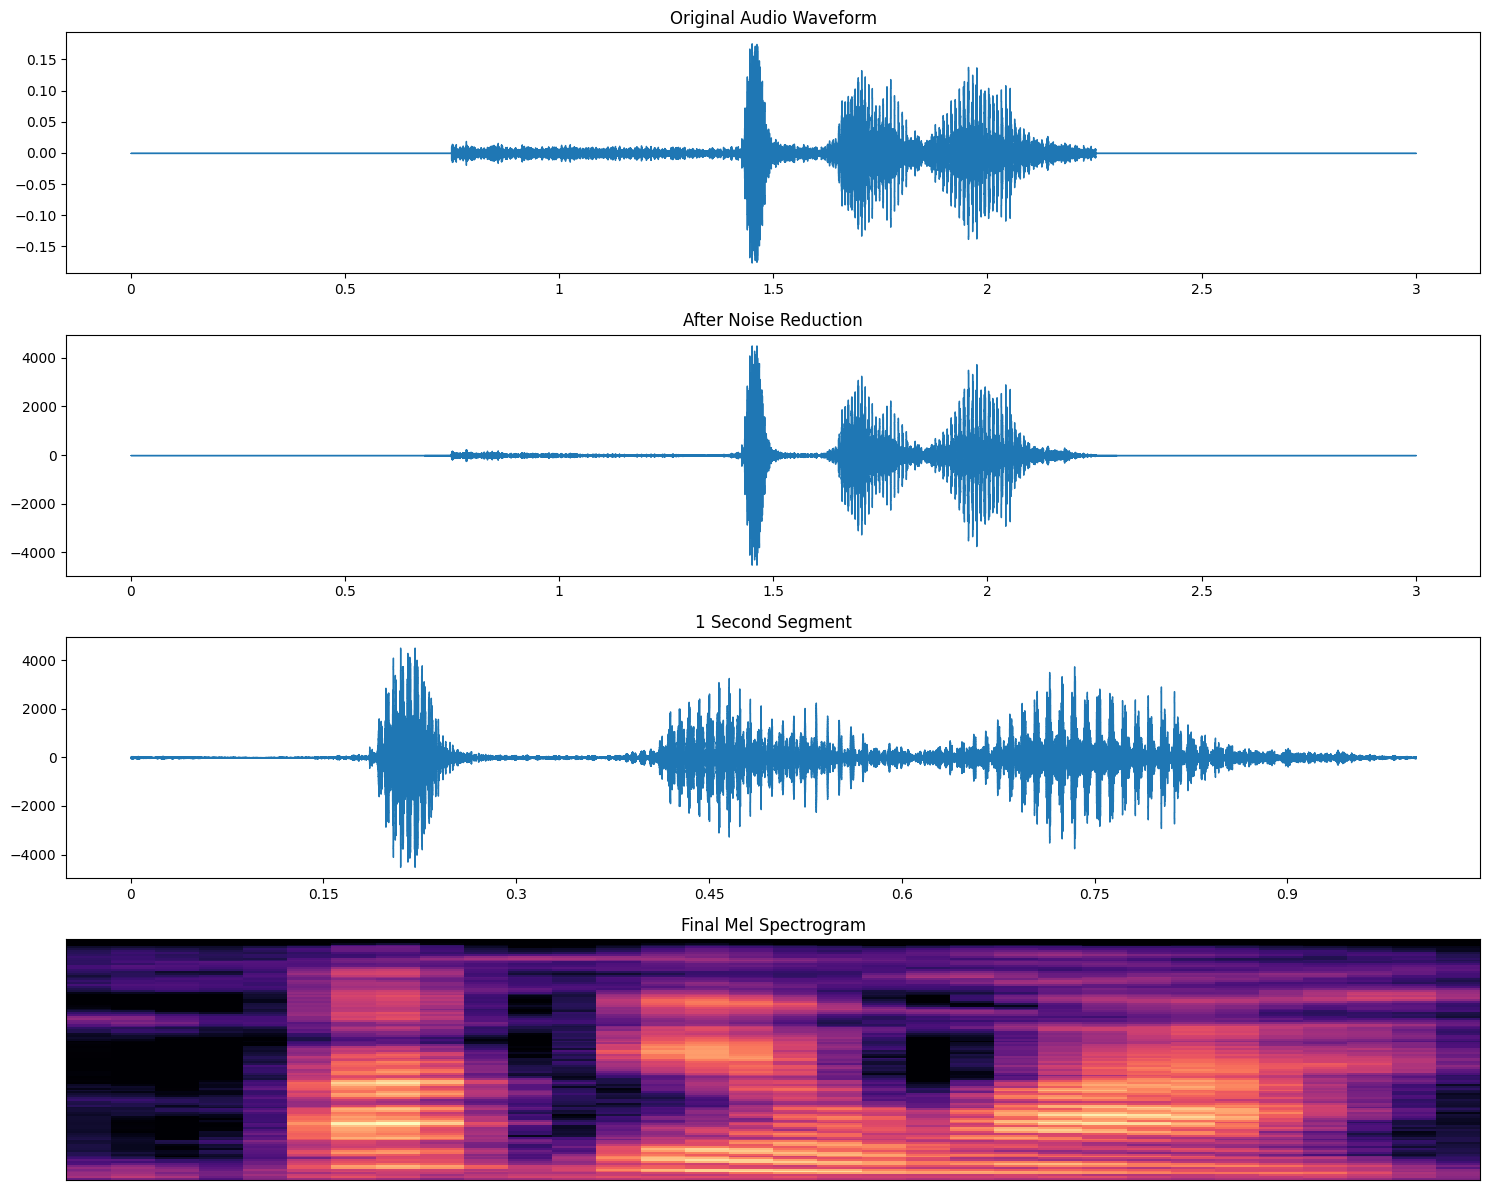

File: ../data/raw/tat_dieu_hoa/tat_dieu_hoa_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 11820365824.00
Final energy: 288428785664.00
Energy ratio (Final/Original): 24.40

Visualizing processing steps for: tat_quat


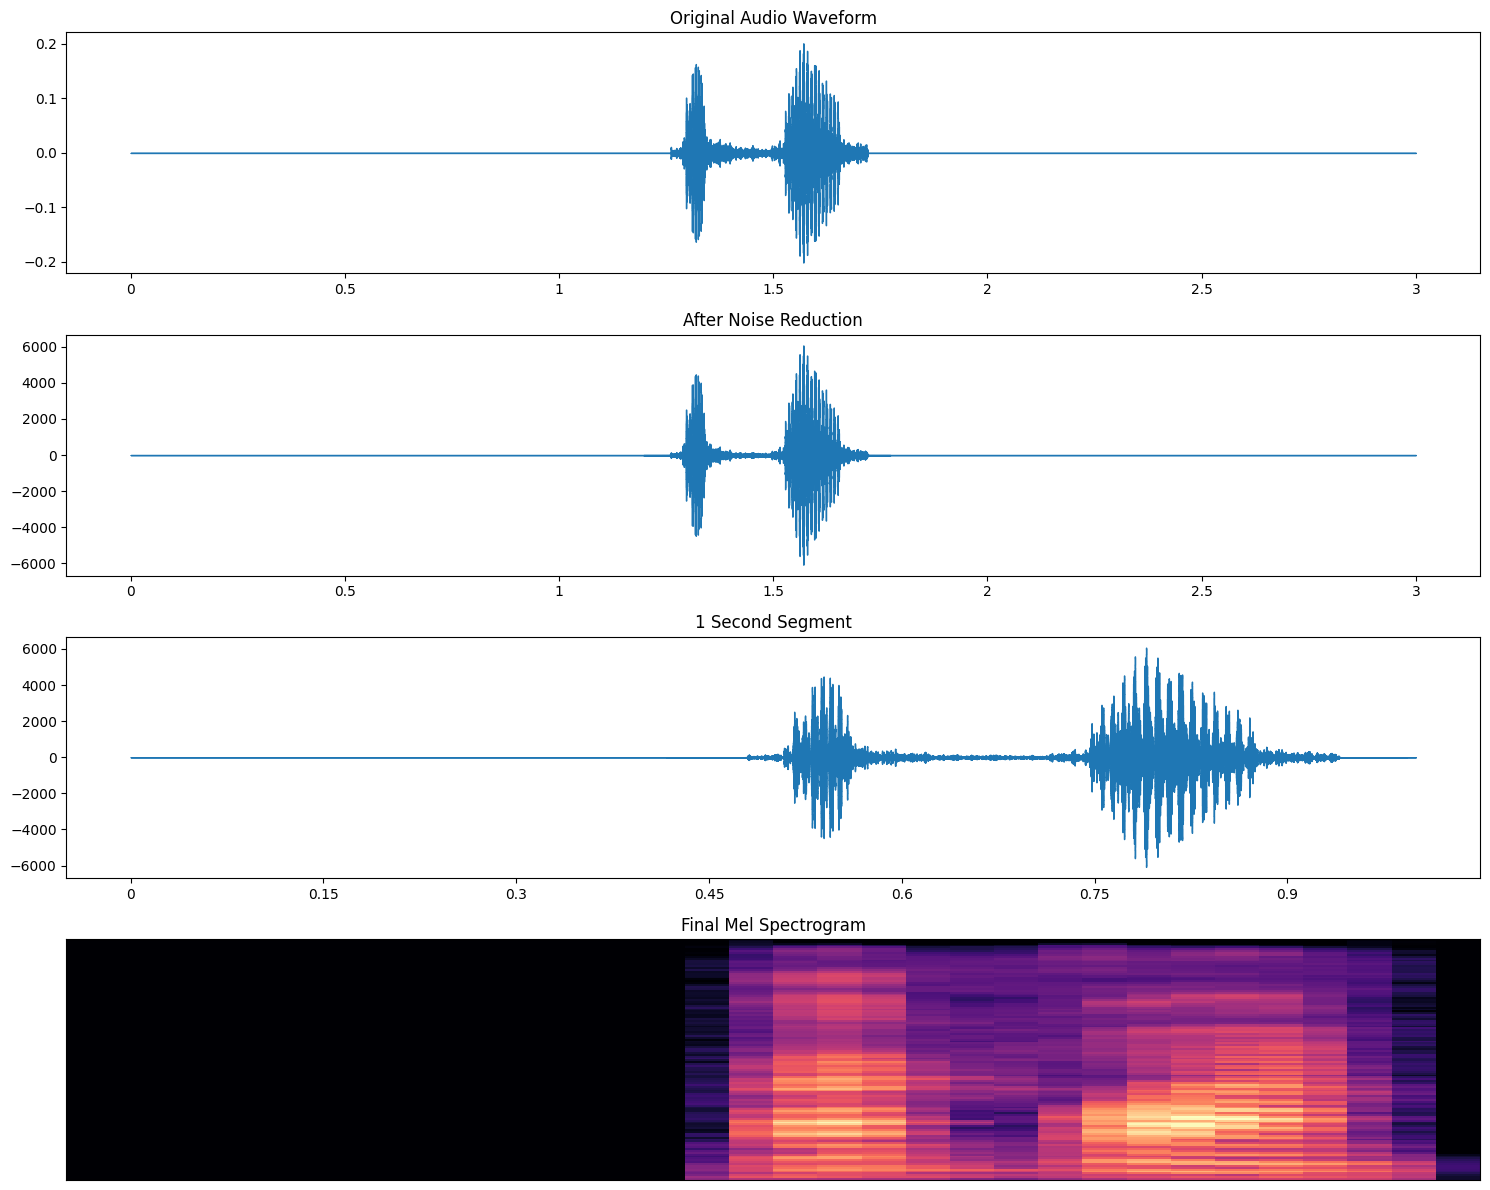

File: ../data/raw/tat_quat/tat_quat_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 10816209920.00
Final energy: 224536576000.00
Energy ratio (Final/Original): 20.76

Visualizing processing steps for: tat_tv


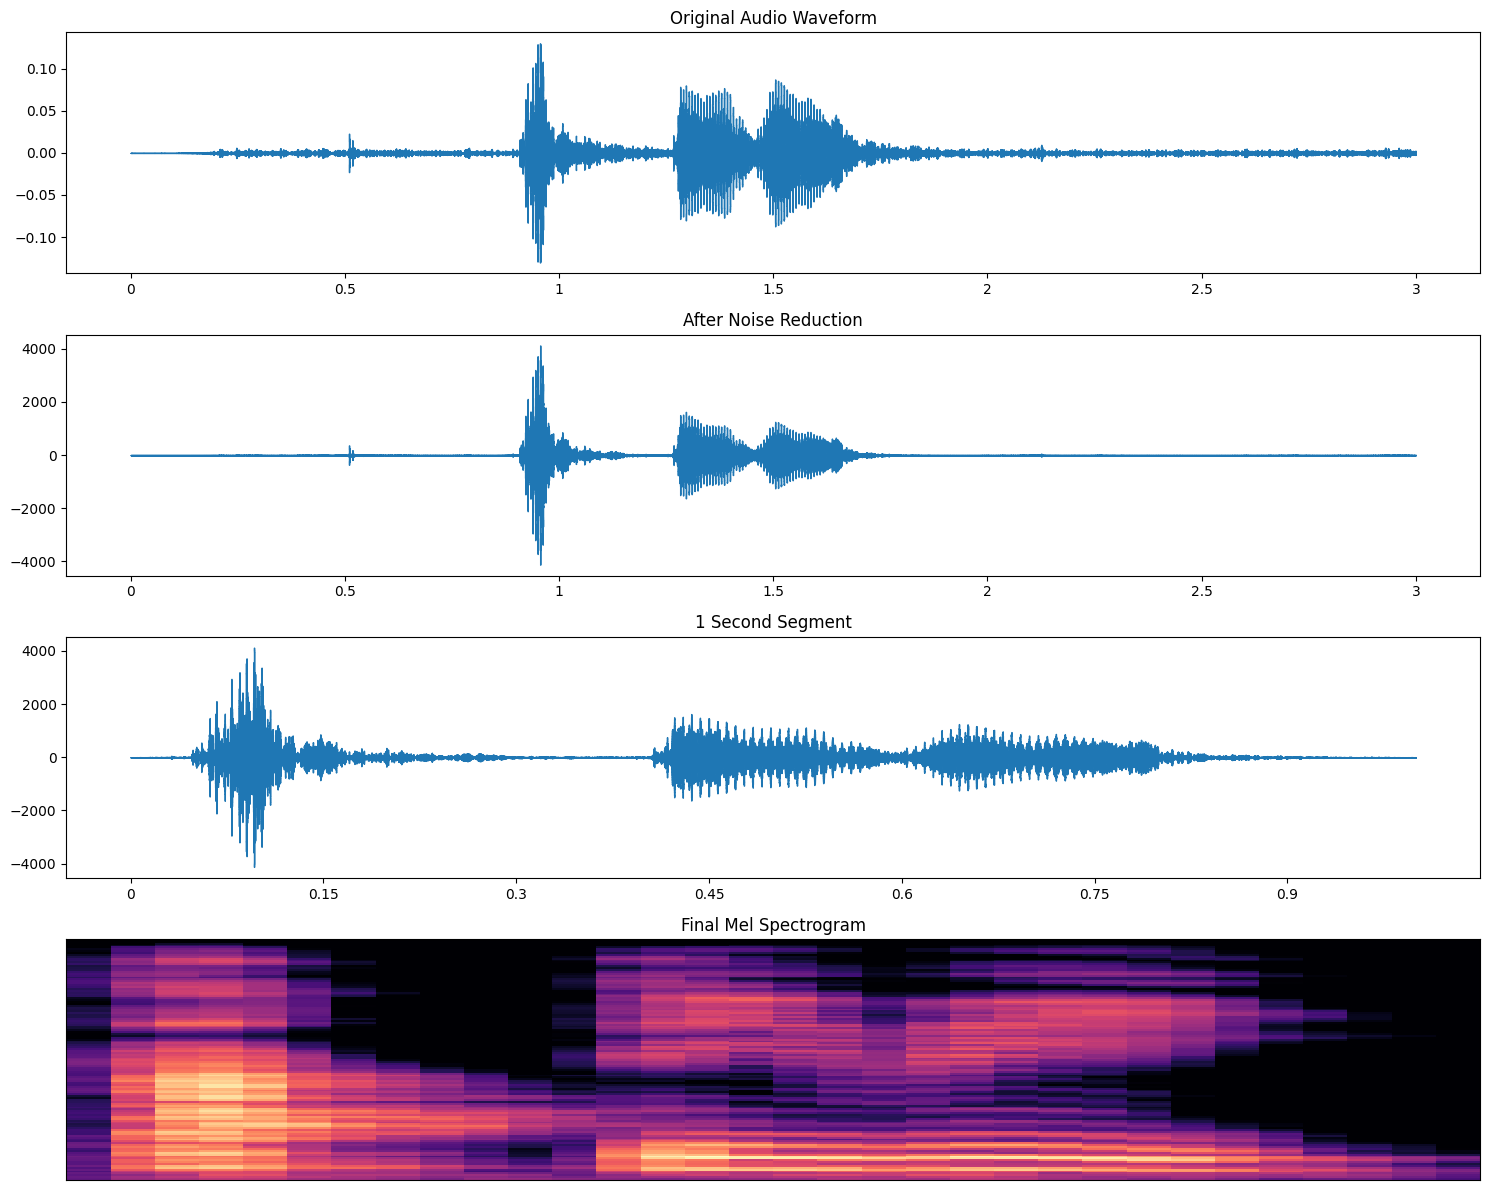

File: ../data/raw/tat_tv/tat_tv_speaker01_001.wav
Original duration: 3.00s
Final duration: 1.00s
Sample rate: 16000Hz

Energy analysis:
Original energy: 7895862784.00
Final energy: 163917316096.00
Energy ratio (Final/Original): 20.76


In [3]:
# Cell 3: Thử nghiệm với một số file mẫu
raw_dir = "../data/raw"

# Lấy một file từ mỗi command để trực quan hóa
for command_dir in os.listdir(raw_dir):
    command_path = os.path.join(raw_dir, command_dir)
    if not os.path.isdir(command_path):
        continue
        
    # Lấy file đầu tiên của mỗi command
    wav_files = [f for f in os.listdir(command_path) if f.endswith('.wav')]
    if wav_files:
        input_path = os.path.join(command_path, wav_files[0])
        print(f"\nVisualizing processing steps for: {command_dir}")
        visualize_processing_steps(input_path)